# Data Preprocessing: 

In [247]:
import os
import numpy as np

In [248]:
import cv2

In [249]:
male = 0
female = 0

In [250]:
directories = ["E:/fp-dataset/SOCOFing/Real","E:/fp-dataset/SOCOFing/Altered/Altered-Easy","E:/fp-dataset/SOCOFing/Altered/Altered-Hard","E:/fp-dataset/SOCOFing/Altered/Altered-Medium"]
for directory in directories:
    for filename in os.listdir(directory):
        if filename[:-4].find('M')>-1:
            male += 1
        else:
            female += 1

In [251]:
print(male)
print(female)

44203
11067


In [252]:
male=0
female=0

In [253]:
maleDataset = []
femaleDataset = []

In [254]:
def preprocess(directory,filename):
    global male,female
    gender = 0 if filename[:-4].find('M')>-1 else 1
    image = cv2.imread(os.path.join(directory,filename),cv2.IMREAD_GRAYSCALE)
    #cvt to binary
    image = cv2.threshold(image,128,255,cv2.THRESH_BINARY)[1]
    #resize
    image = cv2.resize(image,(96,103),interpolation=cv2.INTER_AREA)
    
    if gender==0:
        if male>=11000:
            return
        else:
            maleDataset.append((image,gender))
            male += 1
    
    if gender==1: 
        if female>=11000:
            return
        else:
            femaleDataset.append((image,gender))
            female += 1
    
    
    
    
    

In [255]:
#preprocess("E:/fp-dataset/SOCOFing/Real","31__F_Right_index_finger.BMP")

In [256]:
#print(dataset[0])

In [257]:
directories = ["E:/fp-dataset/SOCOFing/Real","E:/fp-dataset/SOCOFing/Altered/Altered-Easy","E:/fp-dataset/SOCOFing/Altered/Altered-Hard","E:/fp-dataset/SOCOFing/Altered/Altered-Medium"]
for directory in directories:
    for filename in os.listdir(directory):
        preprocess(directory,filename)

In [260]:
print(maleDataset[600][1])

0


In [261]:
print(male,female)

11000 11000


In [263]:
import matplotlib.pyplot as plt

In [270]:
maleTrainData = maleDataset[:10000]
maleTestData = maleDataset[10000:]
femaleTrainData = femaleDataset[:10000]
femaleTestData = femaleDataset[10000:]

In [271]:
trainDataset = maleTrainData + femaleTrainData
testDataset = maleTestData + femaleTestData

In [276]:
import random
random.shuffle(trainDataset)
random.shuffle(testDataset)

In [283]:
testX = []
testY = []
trainX = []
trainY = []

In [284]:
for (feature,label) in trainDataset:
    trainX.append(feature)
    trainY.append(label)
    
for (feature,label) in testDataset:
    testX.append(feature)
    testY.append(label)

In [351]:
len(trainY)

20000

In [352]:
testX = np.stack(testX,axis=0)
testY = np.stack(testY,axis=0)
trainX = np.stack(trainX,axis=0)
trainY = np.stack(trainY,axis=0)

# CNN: 

In [353]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [372]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(103,96,1)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [373]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [374]:
loss_history = []
val_loss_history = []
accuracy_history = []
val_accuracy_history = []

In [397]:
history = model.fit(trainX,trainY, validation_data=(testX,testY), epochs=2, batch_size=32)

Epoch 1/2
625/625 [==============================] - 101s 161ms/step - loss: 0.2230 - accuracy: 0.9064 - val_loss: 0.2686 - val_accuracy: 0.8900
Epoch 2/2
625/625 [==============================] - 106s 169ms/step - loss: 0.1917 - accuracy: 0.9227 - val_loss: 0.2735 - val_accuracy: 0.8945


In [398]:
print(history.history['loss'])

[0.22297053039073944, 0.1917111575603485]


In [399]:
for key in history.history.keys():
    if key=='loss':
        loss_history = loss_history + history.history['loss']
    elif key=='accuracy':
        accuracy_history = accuracy_history + history.history['accuracy']
    elif key=='val_loss':
        val_loss_history = val_loss_history + history.history['val_loss']
    elif key=='val_accuracy':
        val_accuracy_history = val_accuracy_history + history.history['val_accuracy']

In [400]:
print(loss_history)
print(accuracy_history)
print(val_loss_history)
print(val_accuracy_history)

[0.7211240530014038, 0.6154020428657532, 0.5529557466506958, 0.4901670813560486, 0.432483434677124, 0.38425853848457336, 0.3480980694293976, 0.30881181359291077, 0.2774503529071808, 0.2476842999458313, 0.22297053039073944, 0.1917111575603485]
[0.5802000164985657, 0.6409500241279602, 0.6938499808311462, 0.7440999746322632, 0.7791000008583069, 0.8097000122070312, 0.8341000080108643, 0.857450008392334, 0.8754500150680542, 0.8900499939918518, 0.9064499735832214, 0.9226999878883362]
[0.6249241232872009, 0.5822479724884033, 0.4977160692214966, 0.44876566529273987, 0.4241522252559662, 0.38990506529808044, 0.3431505560874939, 0.3440069854259491, 0.3271382451057434, 0.3144727647304535, 0.2685549855232239, 0.2734556496143341]
[0.6209999918937683, 0.6545000076293945, 0.734499990940094, 0.7609999775886536, 0.781000018119812, 0.8069999814033508, 0.8410000205039978, 0.8460000157356262, 0.8550000190734863, 0.8725000023841858, 0.8899999856948853, 0.8945000171661377]


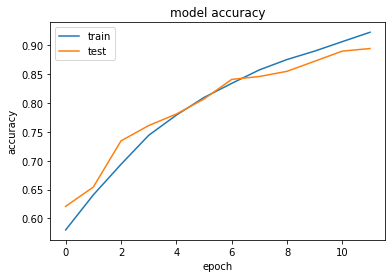

In [401]:
# summarise performance in context of accuracy
plt.plot(accuracy_history)
plt.plot(val_accuracy_history)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

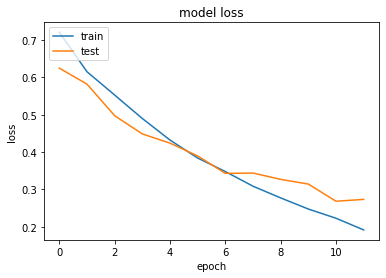

In [402]:
# summarise performance in context of loss
plt.plot(loss_history)
plt.plot(val_loss_history)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

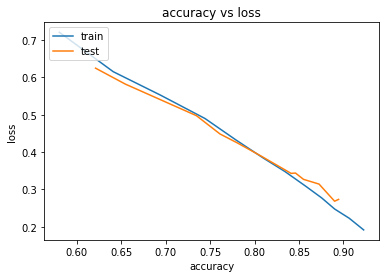

In [404]:
# summarise performance : acc vs loss - training phase
plt.plot(accuracy_history,loss_history)
plt.plot(val_accuracy_history,val_loss_history)
plt.title('accuracy vs loss')
plt.ylabel('loss')
plt.xlabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [320]:
#model.evaluate(testX,testY)

63/63 [==============================] - 4s 64ms/step - loss: 0.3727 - accuracy: 0.8570


[0.3726825416088104, 0.8569999933242798]

In [321]:
for image,gender in testDataset:
    print(gender,end='')

0010111010011101000001001001101010001100010000000011111001011011101110001011011100100010101001011100010110001110110100101110011111010000001110010100001100000111110011000101101100101011001010011000101011001111100110111000100100101011111011010011101001000101011010001100000000000000011010000001110010101111011000111110101101110011101100111001001111110000110110100011101011101000000011101011101001100101100000110011101101100001101011101011111001111100001010101110001001111111000111001110001001101011100000101111011101100101110010111110100111101001110000110110010111001100101011111011010111110010011111110000100011100111001011010000100110100000000100110011100000110111000101001001100110100101011110011111101111100010000001010110011110011011111101010100011111100110110100101110011010101010111011100111111100111111111010101011111000110111111001101000111101100100110101110101011111010110101010011111101101110000100000000001010000000001101111000001001000110111011000010010000011111001010110100010001000011111

In [419]:
actualY = testY
predictOutput = model.predict(testX).round().astype(int)

63/63 [==============================] - 2s 35ms/step


In [434]:
predictedY = []
for array in predictOutput:
    predictedY.append(array[0])
predictedY = np.stack(predictedY,axis=0)
print(predictedY,actualY)

[0 0 1 ... 1 0 1] [0 0 1 ... 1 0 1]


In [444]:
i=0
count = 0
for i in range(len(actualY)):
    if (actualY[i]==1 and predictedY[i]==0):
        count += 1
print(f'correct males={count}')

correct males=96


In [435]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(actualY, predictedY)
print(cf_matrix)

[[885 115]
 [ 96 904]]


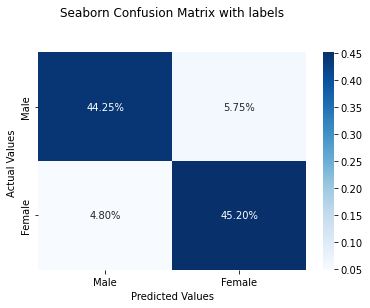

In [445]:
import seaborn as sns
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix),fmt='.2%', annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Male','Female'])
ax.yaxis.set_ticklabels(['Male','Female'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [450]:
pip install scikit-plot

  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\RAUNAK\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


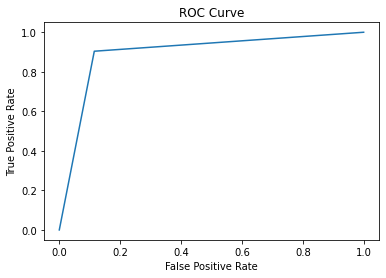

In [454]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Compute ROC curve
fpr, tpr, _ = roc_curve(actualY, predictedY)

# Create RocCurveDisplay object
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Plot ROC curve
roc_display.plot()

# Add labels and show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [455]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 101, 94, 32)       320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 47, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 45, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 22, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 16896)             0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [344]:
from copy import deepcopy

In [345]:
newTestDataset = deepcopy(testDataset)

In [346]:
newmaleTestDatasetX = []
newmaleTestDatasetY = []
for image,gender in newTestDataset:
    if gender==1: continue
    newmaleTestDatasetX.append(image)
    newmaleTestDatasetY.append(gender)


In [347]:
len(newmaleTestDatasetX)

1000

In [348]:
newmaleTestDatasetX = np.stack(newmaleTestDatasetX,axis=0)
newmaleTestDatasetY = np.stack(newmaleTestDatasetY,axis=0)

In [349]:
model.evaluate(newmaleTestDatasetX,newmaleTestDatasetY)

32/32 [==============================] - 2s 60ms/step - loss: 0.4302 - accuracy: 0.8520


[0.43021512031555176, 0.8519999980926514]

63/63 [==============================] - 2s 37ms/step - loss: 0.3727 - accuracy: 0.8570


[0.3726826310157776, 0.8569999933242798]